In [172]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from glob import glob
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

##Import any other packages you may need here
from itertools import chain
from random import sample 
import scipy
import pydicom

EDA is open-ended, and it is up to you to decide how to look at different ways to slice and dice your data. A good starting point is to look at the requirements for the FDA documentation in the final part of this project to guide (some) of the analyses you do. 

This EDA should also help to inform you of how pneumonia looks in the wild. E.g. what other types of diseases it's commonly found with, how often it is found, what ages it affects, etc. 

Note that this NIH dataset was not specifically acquired for pneumonia. So, while this is a representation of 'pneumonia in the wild,' the prevalence of pneumonia may be different if you were to take only chest x-rays that were acquired in an ER setting with suspicion of pneumonia. 

Perform the following EDA:
* The patient demographic data such as gender, age, patient position,etc. (as it is available)
* The x-ray views taken (i.e. view position)
* The number of cases including: 
    * number of pneumonia cases,
    * number of non-pneumonia cases
* The distribution of other diseases that are comorbid with pneumonia
* Number of disease per patient 
* Pixel-level assessments of the imaging data for healthy & disease states of interest (e.g. histograms of intensity values) and compare distributions across diseases.

Note: use full NIH data to perform the first a few EDA items and use `sample_labels.csv` for the pixel-level assassements. 

Also, **describe your findings and how will you set up the model training based on the findings.**

In [173]:
## Below is some helper code to read data for you.
## Load NIH data
all_xray_df = pd.read_csv('/data/Data_Entry_2017.csv')
all_xray_df.sample(10)

Image Index                 Finding Labels  Follow-up #  \
76367   00018739_006.png                     No Finding            6   
53952   00013611_003.png                     No Finding            3   
11556   00003028_059.png                   Infiltration           59   
21906   00005801_007.png                     No Finding            7   
7416    00001951_017.png                     No Finding           17   
60029   00014822_004.png    Emphysema|Mass|Pneumothorax            4   
108756  00029511_001.png  Emphysema|Nodule|Pneumothorax            1   
9788    00002529_027.png                     No Finding           27   
97015   00025581_000.png                   Infiltration            0   
99422   00026301_005.png                     No Finding            5   

        Patient ID  Patient Age Patient Gender View Position  \
76367        18739           65              M            PA   
53952        13611           33              M            PA   
11556         3028           58              F            AP   
21906         5801           27              F            PA   
7416          1951           16              M            AP   
60029        14822           63              F            PA   
108756       29511           45              M            AP   
9788          2529           18              F            AP   
97015        25581            3              F            PA   
99422        26301           49              F            PA   

        OriginalImage[Width  Height]  OriginalImagePixelSpacing[x     y]  \
76367                  2992     2991                        0.143  0.143   
53952                  2990     2991                        0.143  0.143   
11556                  2500     2048                        0.168  0.168   
21906                  2048     2500                        0.168  0.168   
7416                   2048     2500                        0.168  0.168   
60029                  2992     2991                        0.143  0.143   
108756                 3056     2544                        0.139  0.139   
9788                   2500     2048                        0.168  0.168   
97015                  1674     1796                        0.143  0.143   
99422                  2774     2991                        0.143  0.143   

        Unnamed: 11  
76367           NaN  
53952           NaN  
11556           NaN  
21906           NaN  
7416            NaN  
60029           NaN  
108756          NaN  
9788            NaN  
97015           NaN  
99422           NaN

In [174]:
## Load 'sample_labels.csv' data for pixel level assessments
sample_df = pd.read_csv('sample_labels.csv')
sample_df.sample(10)

Image Index               Finding Labels  Follow-up #  Patient ID  \
1237  00006519_005.png                   No Finding            5        6519   
3497  00017213_002.png                   No Finding            2       17213   
1488  00007735_027.png                   No Finding           27        7735   
2695  00013613_007.png  Effusion|Pleural_Thickening            7       13613   
4114  00020261_002.png                   No Finding            2       20261   
3624  00017835_010.png                  Atelectasis           10       17835   
2703  00013615_056.png                   No Finding           56       13615   
154   00000877_023.png                   No Finding           23         877   
943   00004904_013.png  Consolidation|Effusion|Mass           13        4904   
4466  00022245_016.png        Effusion|Infiltration           16       22245   

     Patient Age Patient Gender View Position  OriginalImageWidth  \
1237        057Y              M            AP                2500   
3497        049Y              F            AP                2048   
1488        031Y              M            AP                2500   
2695        048Y              F            AP                2500   
4114        038Y              F            PA                2450   
3624        047Y              M            PA                2804   
2703        011Y              F            AP                2500   
154         039Y              M            AP                2500   
943         053Y              F            AP                2500   
4466        066Y              M            PA                2992   

      OriginalImageHeight  OriginalImagePixelSpacing_x  \
1237                 2048                        0.171   
3497                 2500                        0.168   
1488                 2048                        0.168   
2695                 2048                        0.168   
4114                 2991                        0.143   
3624                 2704                        0.143   
2703                 2048                        0.168   
154                  2048                        0.168   
943                  2048                        0.171   
4466                 2991                        0.143   

      OriginalImagePixelSpacing_y  
1237                        0.171  
3497                        0.168  
1488                        0.168  
2695                        0.168  
4114                        0.143  
3624                        0.143  
2703                        0.168  
154                         0.168  
943                         0.171  
4466                        0.143

In [175]:
## EDA
# Todo 

## Check for null values

all_xray_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112120 entries, 0 to 112119
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Image Index                  112120 non-null  object 
 1   Finding Labels               112120 non-null  object 
 2   Follow-up #                  112120 non-null  int64  
 3   Patient ID                   112120 non-null  int64  
 4   Patient Age                  112120 non-null  int64  
 5   Patient Gender               112120 non-null  object 
 6   View Position                112120 non-null  object 
 7   OriginalImage[Width          112120 non-null  int64  
 8   Height]                      112120 non-null  int64  
 9   OriginalImagePixelSpacing[x  112120 non-null  float64
 10  y]                           112120 non-null  float64
 11  Unnamed: 11                  0 non-null       float64
dtypes: float64(3), int64(5), object(4)
memory usage: 10.3+ MB


In [176]:
all_xray_df.columns

Index(['Image Index', 'Finding Labels', 'Follow-up #', 'Patient ID',
       'Patient Age', 'Patient Gender', 'View Position', 'OriginalImage[Width',
       'Height]', 'OriginalImagePixelSpacing[x', 'y]', 'Unnamed: 11'],
      dtype='object')

In [177]:
all_xray_df.shape

(112120, 12)

## Patient Gender

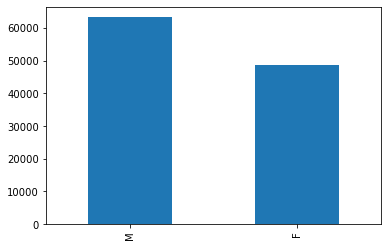

In [178]:
all_xray_df['Patient Gender'].value_counts().plot(kind='bar')

In [179]:
all_xray_df['Patient Gender'].describe()

count     112120
unique         2
top            M
freq       63340
Name: Patient Gender, dtype: object

## Patient Age

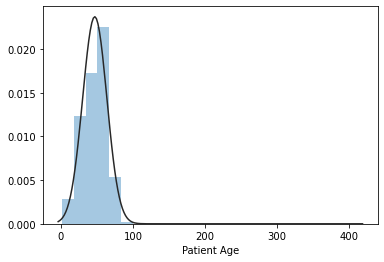

In [180]:
from scipy.stats import norm
sns.distplot(all_xray_df['Patient Age'], hist=True, bins=25, fit=norm, kde=False)

In [181]:
all_xray_df['Patient Age'].describe()

count    112120.000000
mean         46.901463
std          16.839923
min           1.000000
25%          35.000000
50%          49.000000
75%          59.000000
max         414.000000
Name: Patient Age, dtype: float64

## Patient View Position

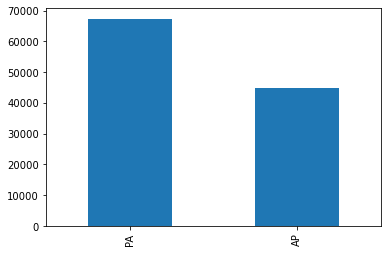

In [182]:
all_xray_df['View Position'].value_counts().plot(kind='bar')

In [183]:
all_xray_df['View Position'].describe()

count     112120
unique         2
top           PA
freq       67310
Name: View Position, dtype: object

## Analysis 1 

1. After plotting patient's age and gender, we can clearly see that majority of the data consists of male samples and average age is around 47.

2. By analysing patient view postion we have majority cases taken as PA. and the questiom is what is PA and AP. 

3. PA X-ray: An X-ray picture in which the beams pass from back-to-front (posteroanterior). As opposed to an AP (anteroposterior) image in which the rays pass through the body from front-to-back.

4. AP, X-ray: An X-ray picture in which the beams pass from front-to-back (anteroposterior). As opposed to a PA (posteroanterior) film in which the rays pass through the body from back-to-front.

**Definition source:** [medicinenet](https://www.medicinenet.com/ap_x-ray/definition.htm)

## Number of Pneumonia VS Non Pneumonia Cases

Here we are splitting up the 'Finding Labels' column into one additional column per disease (e.g. one for 'Cardiomegaly', one for 'Emphysema', etc.) and put a binary flag in that column to indicate the presence of the disease.

In [184]:
## Pre processing on dataframe

all_labels = np.unique(list(chain(*all_xray_df['Finding Labels'].map(lambda x: x.split('|')).tolist())))
all_labels = [x for x in all_labels if len(x)>0]
print('All Labels ({}): {}'.format(len(all_labels), all_labels))

All Labels (15): ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


In [185]:
for c_label in all_labels:
    if len(c_label)>1: # leave out empty labels
        all_xray_df[c_label] = all_xray_df['Finding Labels'].map(lambda finding: 1.0 if c_label in finding else 0)
all_xray_df.sample(5)

Image Index         Finding Labels  Follow-up #  Patient ID  \
94014  00023815_000.png             No Finding            0       23815   
12014  00003129_012.png  Fibrosis|Infiltration           12        3129   
90108  00022409_006.png             No Finding            6       22409   
53912  00013602_003.png             No Finding            3       13602   
91456  00022815_077.png           Infiltration           77       22815   

       Patient Age Patient Gender View Position  OriginalImage[Width  Height]  \
94014           34              F            PA                 2836     2991   
12014           62              M            AP                 2500     2048   
90108           65              M            AP                 3056     2544   
53912           47              M            PA                 2992     2991   
91456            9              M            AP                 3056     2544   

       OriginalImagePixelSpacing[x  ...  Emphysema  Fibrosis  Hernia  \
94014                        0.143  ...        0.0       0.0     0.0   
12014                        0.168  ...        0.0       1.0     0.0   
90108                        0.139  ...        0.0       0.0     0.0   
53912                        0.143  ...        0.0       0.0     0.0   
91456                        0.139  ...        0.0       0.0     0.0   

       Infiltration  Mass  No Finding  Nodule  Pleural_Thickening  Pneumonia  \
94014           0.0   0.0         1.0     0.0                 0.0        0.0   
12014           1.0   0.0         0.0     0.0                 0.0        0.0   
90108           0.0   0.0         1.0     0.0                 0.0        0.0   
53912           0.0   0.0         1.0     0.0                 0.0        0.0   
91456           1.0   0.0         0.0     0.0                 0.0        0.0   

       Pneumothorax  
94014           0.0  
12014           0.0  
90108           0.0  
53912           0.0  
91456           0.0  

[5 rows x 27 columns]

In [186]:
pos_cnt = all_xray_df['Patient ID'][all_xray_df['Pneumonia'] == 1].value_counts().sum()
neg_cnt = all_xray_df['Patient ID'][all_xray_df['Pneumonia'] == 0].value_counts().sum()
print('Pneumonia Cases: %s and Non-Pneumonia Cases: %s' % (pos_cnt, neg_cnt))

Pneumonia Cases: 1431 and Non-Pneumonia Cases: 110689


## Analysis 2

Here we can clearly see that, we have 1431 cases of pneumonia and 110689 cases of non-pneumonia

## The distribution of other diseases that are comorbid with pneumonia

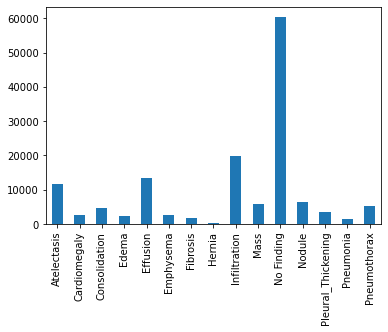

In [187]:
all_xray_df[all_labels].sum().plot(kind='bar')

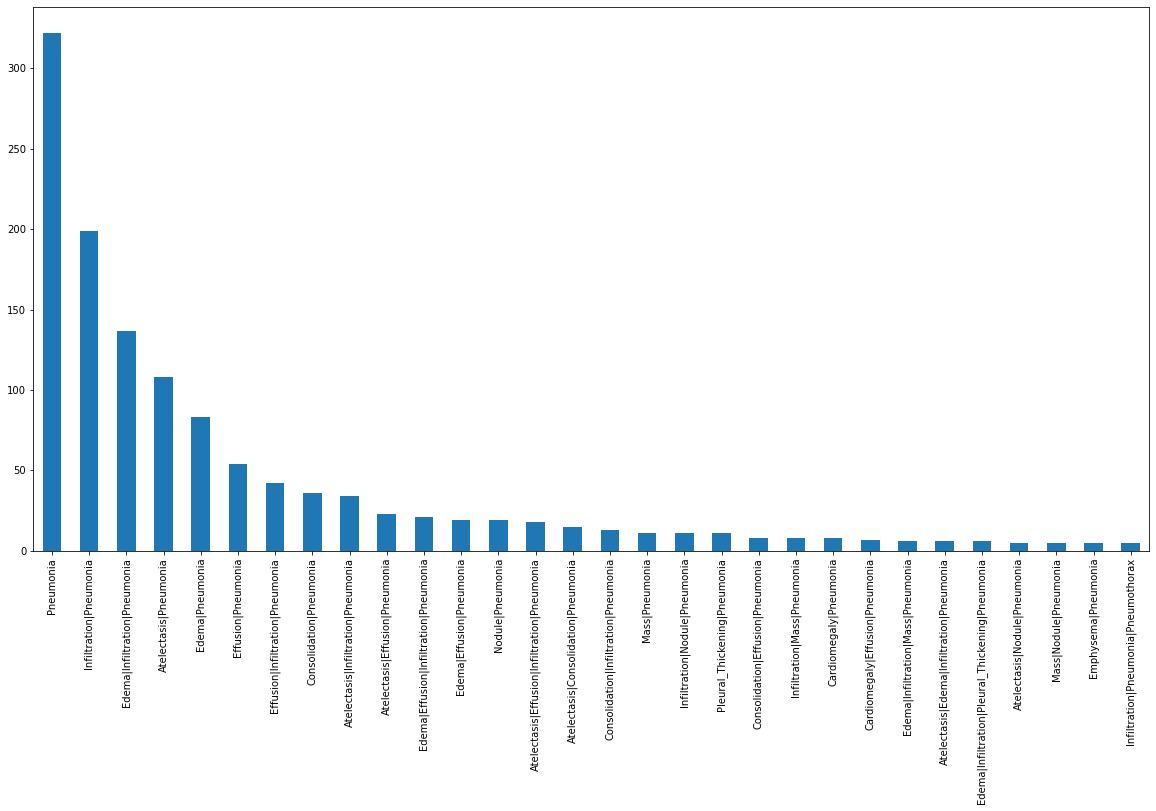

In [188]:
plt.figure(figsize=(20,10))
all_xray_df[all_xray_df['Pneumonia'] == 1]['Finding Labels'].value_counts()[:30].plot(kind='bar')

## Analysis 3

Here after plotting the distribution of occurence of other diseases with pneumonia, we can see that most commonly occuring diseases with pneumonia are Infiltration, Edemal, Atelectasis and consolidation.

## Number of disease per patient

In [189]:
all_xray_df.head()

Image Index          Finding Labels  Follow-up #  Patient ID  \
0  00000001_000.png            Cardiomegaly            0           1   
1  00000001_001.png  Cardiomegaly|Emphysema            1           1   
2  00000001_002.png   Cardiomegaly|Effusion            2           1   
3  00000002_000.png              No Finding            0           2   
4  00000003_000.png                  Hernia            0           3   

   Patient Age Patient Gender View Position  OriginalImage[Width  Height]  \
0           58              M            PA                 2682     2749   
1           58              M            PA                 2894     2729   
2           58              M            PA                 2500     2048   
3           81              M            PA                 2500     2048   
4           81              F            PA                 2582     2991   

   OriginalImagePixelSpacing[x  ...  Emphysema  Fibrosis  Hernia  \
0                        0.143  ...        0.0       0.0     0.0   
1                        0.143  ...        1.0       0.0     0.0   
2                        0.168  ...        0.0       0.0     0.0   
3                        0.171  ...        0.0       0.0     0.0   
4                        0.143  ...        0.0       0.0     1.0   

   Infiltration  Mass  No Finding  Nodule  Pleural_Thickening  Pneumonia  \
0           0.0   0.0         0.0     0.0                 0.0        0.0   
1           0.0   0.0         0.0     0.0                 0.0        0.0   
2           0.0   0.0         0.0     0.0                 0.0        0.0   
3           0.0   0.0         1.0     0.0                 0.0        0.0   
4           0.0   0.0         0.0     0.0                 0.0        0.0   

   Pneumothorax  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  

[5 rows x 27 columns]

In [190]:
print(all_labels)

['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


In [191]:
all_xray_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112120 entries, 0 to 112119
Data columns (total 27 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Image Index                  112120 non-null  object 
 1   Finding Labels               112120 non-null  object 
 2   Follow-up #                  112120 non-null  int64  
 3   Patient ID                   112120 non-null  int64  
 4   Patient Age                  112120 non-null  int64  
 5   Patient Gender               112120 non-null  object 
 6   View Position                112120 non-null  object 
 7   OriginalImage[Width          112120 non-null  int64  
 8   Height]                      112120 non-null  int64  
 9   OriginalImagePixelSpacing[x  112120 non-null  float64
 10  y]                           112120 non-null  float64
 11  Unnamed: 11                  0 non-null       float64
 12  Atelectasis                  112120 non-null  float64
 13 

In [192]:
subset_df = all_xray_df.iloc[:,12:27].copy()
subset_df.head()

Atelectasis  Cardiomegaly  Consolidation  Edema  Effusion  Emphysema  \
0          0.0           1.0            0.0    0.0       0.0        0.0   
1          0.0           1.0            0.0    0.0       0.0        1.0   
2          0.0           1.0            0.0    0.0       1.0        0.0   
3          0.0           0.0            0.0    0.0       0.0        0.0   
4          0.0           0.0            0.0    0.0       0.0        0.0   

   Fibrosis  Hernia  Infiltration  Mass  No Finding  Nodule  \
0       0.0     0.0           0.0   0.0         0.0     0.0   
1       0.0     0.0           0.0   0.0         0.0     0.0   
2       0.0     0.0           0.0   0.0         0.0     0.0   
3       0.0     0.0           0.0   0.0         1.0     0.0   
4       0.0     1.0           0.0   0.0         0.0     0.0   

   Pleural_Thickening  Pneumonia  Pneumothorax  
0                 0.0        0.0           0.0  
1                 0.0        0.0           0.0  
2                 0.0        0.0           0.0  
3                 0.0        0.0           0.0  
4                 0.0        0.0           0.0

In [193]:
subset_df.drop('No Finding', axis=1, inplace=True)

In [194]:
subset_df.head()

Atelectasis  Cardiomegaly  Consolidation  Edema  Effusion  Emphysema  \
0          0.0           1.0            0.0    0.0       0.0        0.0   
1          0.0           1.0            0.0    0.0       0.0        1.0   
2          0.0           1.0            0.0    0.0       1.0        0.0   
3          0.0           0.0            0.0    0.0       0.0        0.0   
4          0.0           0.0            0.0    0.0       0.0        0.0   

   Fibrosis  Hernia  Infiltration  Mass  Nodule  Pleural_Thickening  \
0       0.0     0.0           0.0   0.0     0.0                 0.0   
1       0.0     0.0           0.0   0.0     0.0                 0.0   
2       0.0     0.0           0.0   0.0     0.0                 0.0   
3       0.0     0.0           0.0   0.0     0.0                 0.0   
4       0.0     1.0           0.0   0.0     0.0                 0.0   

   Pneumonia  Pneumothorax  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0

In [195]:
all_xray_df['Disease Count'] = subset_df.sum(axis=1)

In [196]:
all_xray_df['Disease Count'] = df_subset.sum(axis=1)

In [197]:
all_xray_df.head()

Image Index          Finding Labels  Follow-up #  Patient ID  \
0  00000001_000.png            Cardiomegaly            0           1   
1  00000001_001.png  Cardiomegaly|Emphysema            1           1   
2  00000001_002.png   Cardiomegaly|Effusion            2           1   
3  00000002_000.png              No Finding            0           2   
4  00000003_000.png                  Hernia            0           3   

   Patient Age Patient Gender View Position  OriginalImage[Width  Height]  \
0           58              M            PA                 2682     2749   
1           58              M            PA                 2894     2729   
2           58              M            PA                 2500     2048   
3           81              M            PA                 2500     2048   
4           81              F            PA                 2582     2991   

   OriginalImagePixelSpacing[x  ...  Fibrosis  Hernia  Infiltration  Mass  \
0                        0.143  ...       0.0     0.0           0.0   0.0   
1                        0.143  ...       0.0     0.0           0.0   0.0   
2                        0.168  ...       0.0     0.0           0.0   0.0   
3                        0.171  ...       0.0     0.0           0.0   0.0   
4                        0.143  ...       0.0     1.0           0.0   0.0   

   No Finding  Nodule  Pleural_Thickening  Pneumonia  Pneumothorax  \
0         0.0     0.0                 0.0        0.0           0.0   
1         0.0     0.0                 0.0        0.0           0.0   
2         0.0     0.0                 0.0        0.0           0.0   
3         1.0     0.0                 0.0        0.0           0.0   
4         0.0     0.0                 0.0        0.0           0.0   

   Disease Count  
0            1.0  
1            2.0  
2            2.0  
3            0.0  
4            1.0  

[5 rows x 28 columns]

In [198]:
all_xray_df['Disease Count'].value_counts()

0.0    60361
1.0    30963
2.0    14306
3.0     4856
4.0     1247
5.0      301
6.0       67
7.0       16
9.0        2
8.0        1
Name: Disease Count, dtype: int64

Text(0, 0.5, 'Patients Count')

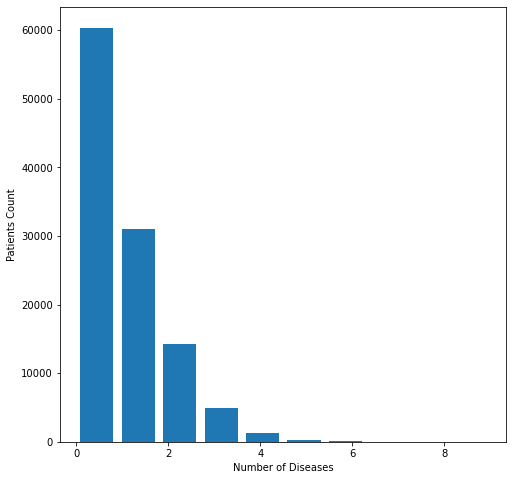

In [199]:
plt.figure(figsize=(8,8))
plt.hist(all_xray_df['Disease Count'], rwidth=0.8)
plt.xlabel('Number of Diseases')
plt.ylabel('Patients Count')

## Analysis 4

From the above manipulations to dataframe, we have calculated a new column named **Disease Count** and we can clearly see that there are 30963 patients with one disease, 14306 patients with two diseases, and 4856 with three diseases respectively

## Pixel-level assessments of the Imaging Data

In [200]:
## Let's examine one DICOM file and its contents 

dcm = pydicom.dcmread('test1.dcm')
dcm

(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.11129.5.5.110503645592756492463169821050252582267888
(0008, 0060) Modality                            CS: 'DX'
(0008, 1030) Study Description                   LO: 'No Finding'
(0010, 0020) Patient ID                          LO: '2'
(0010, 0040) Patient's Sex                       CS: 'M'
(0010, 1010) Patient's Age                       AS: '81'
(0018, 0015) Body Part Examined                  CS: 'CHEST'
(0018, 5100) Patient Position                    CS: 'PA'
(0020, 000d) Study Instance UID                  UI: 1.3.6.1.4.1.11129.5.5.112507010803284478207522016832191866964708
(0020, 000e) Series Instance UID                 UI: 1.3.6.1.4.1.11129.5.5.112630850362182468372440828755218293352329
(0028, 0002) Samples per Pixel                   US: 1
(0028, 0004) Photometric Interpretation          CS: 'MONOCHROME2'
(0028, 0010) Rows       

In [201]:
## Let's do some exploratory work before about how to extract these attributes

print('Patient ID: ',dcm.PatientID)
print('Patient Age: ',dcm.PatientAge)
print('Patient Sex: ',dcm.PatientSex)
print('Modality: ',dcm.Modality)
print('Study Description: ',dcm.StudyDescription)
print('Rows in Image: ',dcm.Rows)
print('Columns in Image: ',dcm.Columns)

Patient ID:  2
Patient Age:  81
Patient Sex:  M
Modality:  DX
Study Description:  No Finding
Rows in Image:  1024
Columns in Image:  1024


In [202]:
## Now we create dataframe from dicom files with necessary attributes

dicom_files = glob('*.dcm')

dicom_data = []

for file in dicom_files: 
    dcm = pydicom.dcmread(file)
    attr = [dcm.PatientID, dcm.PatientAge, dcm.PatientSex, dcm.Modality, dcm.StudyDescription,
             dcm.Rows, dcm.Columns]
    dicom_data.append(attr)

In [203]:
dicom_data

[['2', '81', 'M', 'CT', 'No Finding', 1024, 1024],
 ['2', '81', 'M', 'DX', 'No Finding', 1024, 1024],
 ['2', '81', 'M', 'DX', 'No Finding', 1024, 1024],
 ['1', '58', 'M', 'DX', 'Cardiomegaly', 1024, 1024],
 ['61', '77', 'M', 'DX', 'Effusion', 1024, 1024],
 ['2', '81', 'M', 'DX', 'No Finding', 1024, 1024]]

In [204]:
dicom_df = pd.DataFrame(dicom_data, columns=['PatientID','PatientAge','PatientSex','Modality',
                                        'StudyDescription','Rows','Columns'])

In [205]:
dicom_df.head()

PatientID PatientAge PatientSex Modality StudyDescription  Rows  Columns
0         2         81          M       CT       No Finding  1024     1024
1         2         81          M       DX       No Finding  1024     1024
2         2         81          M       DX       No Finding  1024     1024
3         1         58          M       DX     Cardiomegaly  1024     1024
4        61         77          M       DX         Effusion  1024     1024

In [206]:
def plot_distribution(dcm, finding):
    img_arr = dcm.pixel_array
    
    ## normalize image
    mean, std = np.mean(img_arr), np.std(img_arr)
    img_arr = (img_arr - mean)/std
    
    ## plotting image and its pixel intensity distribution
    
    fig = plt.figure()
    fig.set_figwidth(20)
    
    ## Plotting Image
    
    sub1 = fig.add_subplot(1,2,1)
    sub1.set_title('X-Ray Image with ' + finding)
    sub1.imshow(img_arr, cmap='gray')
    
    ## Plotting Pixel Intensity
    
    sub2 = fig.add_subplot(1,2,2)
    sub2.set_title('Pixel Intensity Distribution of Image with ' + finding)
    plt.hist(img_arr.ravel(), bins=256)
    
    

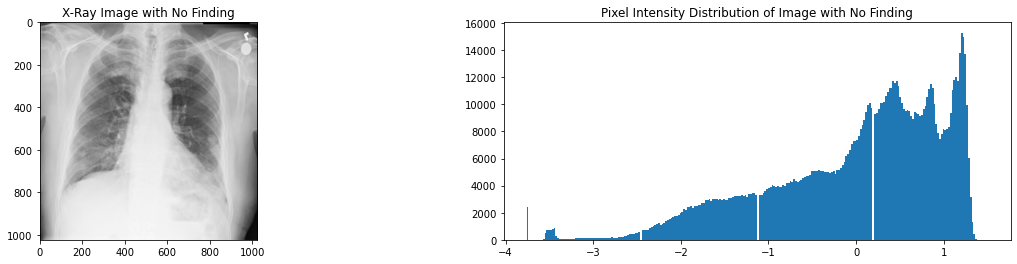

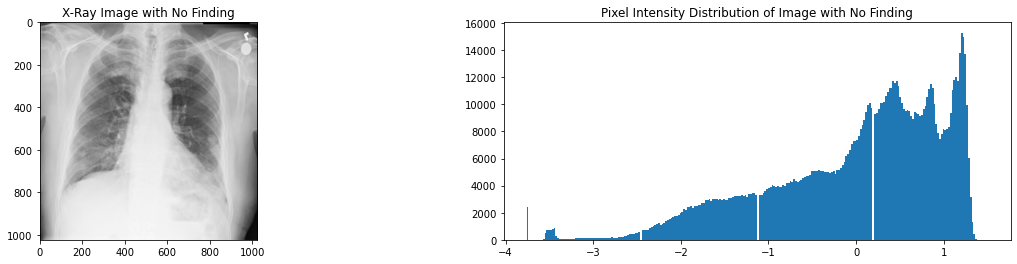

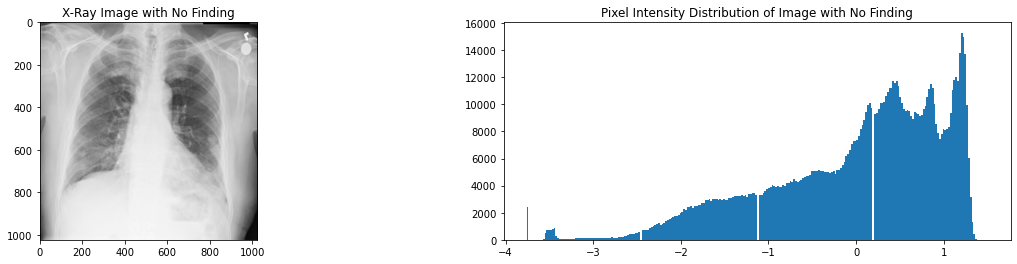

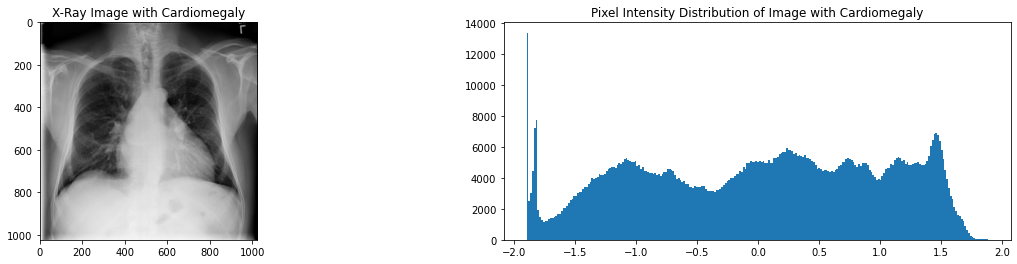

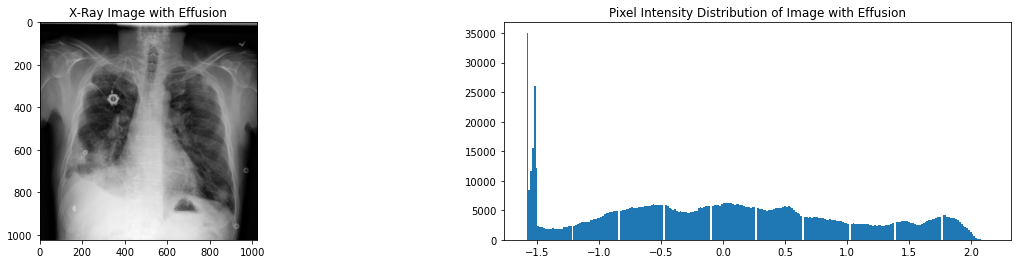

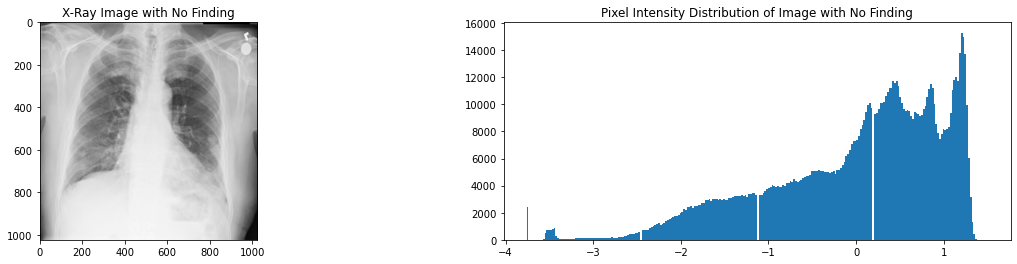

In [207]:
for file in dicom_files: 
    dcm = pydicom.dcmread(file)
    plot_distribution(dcm, dcm.StudyDescription)

## Analysis 5

From the above image and pixel intensity plotting we can clearly see that images with No Finding have skewed distribution, showing tendency towards bright intensity. Whereas images with Effusion and cardiomegaly we see pixel counts evenly cover a broad range of grayscale levels.
